# Import libaries and dataframe from SQLite

In [1]:
# Import libaries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database in SQLite
conn = sqlite3.connect(r'C:\Users\IT\Desktop\Nguyen Dinh Sang\Sample Data.sqlite')

# Read "account" table to DataFrame
df_account = pd.read_sql_query("SELECT * FROM account", conn)

# Read "account_date_session" table to DataFrame
df_account_date_session = pd.read_sql_query("SELECT * FROM account_date_session", conn)

# Read "iap_purchase" table to DataFrame
df_iap_purchase = pd.read_sql_query("SELECT * FROM iap_purchase", conn)

# Close connection
conn.close()

# Data Cleaning

## Dataframe "account"

In [2]:
# Overall "account" dataframe 
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112792 entries, 0 to 112791
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   account_id            112792 non-null  object
 1   created_time          112792 non-null  object
 2   created_device        112792 non-null  object
 3   created_platform      112792 non-null  object
 4   country_code          112685 non-null  object
 5   created_app_store_id  112792 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


In [3]:
df_account.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2


In [4]:
# Convert the 'created_time' column to datetime type
df_account['created_time'] = pd.to_datetime(df_account['created_time'], format="%Y-%m-%d %H:%M:%S.%f")

# Split the 'created_time' column into 'date' and 'time' columns
df_account['date'] = df_account['created_time'].dt.date
df_account['time'] = df_account['created_time'].dt.time
df_account.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id,date,time
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1,2016-03-02,17:11:00.332000
1,4308483975,2016-03-02 20:57:46.140,MIDC147PJ,Android,FR,2,2016-03-02,20:57:46.140000
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2,2016-03-02,13:52:16.735000
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8,2016-03-02,12:43:27.899000
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2,2016-03-02,17:20:12.145000


In [5]:
# Check for duplicated values in 'account_id' column of df_account
duplicates_account = df_account.duplicated()

# Count the number of duplicated values
num_duplicates = duplicates_account.sum()

# Display the duplicated rows based on 'account_id' column
duplicated_rows = df_account[duplicates_account]
print(duplicated_rows)

# Print the total number of duplicated values
print("Total number of duplicated values in 'account_id' column:", num_duplicates)

Empty DataFrame
Columns: [account_id, created_time, created_device, created_platform, country_code, created_app_store_id, date, time]
Index: []
Total number of duplicated values in 'account_id' column: 0


## Dataframe "account_date_session"

In [6]:
# Overall "account_date_session" dataframe 
df_account_date_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698974 entries, 0 to 1698973
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   account_id            object
 1   date                  object
 2   session_count         int64 
 3   session_duration_sec  int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ MB


In [7]:
df_account_date_session.head()

,account_id,date,session_count,session_duration_sec
0,68730811144,2016-01-01,1,47
1,68730812806,2016-01-01,1,204
2,68730829426,2016-01-01,12,4703
3,68730829426,2016-01-02,9,4676
4,68730829426,2016-01-03,9,2271


In [8]:
# Check for duplicated rows in 'account_date_session' table
duplicates_account_date_session = df_account_date_session.duplicated()

# Count the number of duplicated rows
num_duplicates_account_date_session = duplicates_account_date_session.sum()

# Display the duplicated rows
duplicated_rows = df_account_date_session[duplicates_account_date_session]
print(duplicated_rows)

# Print the total number of duplicated rows
print("Total number of duplicated rows in 'account_date_session' table:", num_duplicates_account_date_session)


Empty DataFrame
Columns: [account_id, date, session_count, session_duration_sec]
Index: []
Total number of duplicated rows in 'account_date_session' table: 0


## Dataframe "iap_purchase"

In [9]:
# Overall "iap_purchase" dataframe 
df_iap_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   account_id           9909 non-null   object
 1   created_time         9909 non-null   object
 2   package_id_hash      9909 non-null   object
 3   iap_price_usd_cents  9909 non-null   int64 
 4   app_store_id         9909 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 387.2+ KB


In [10]:
df_iap_purchase.head()

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
1,30077202816,2016-05-31 11:24:37.283,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0
2,21487283560,2016-02-13 03:40:28.644,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
3,21487152816,2016-02-28 00:53:26.678,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
4,8602037685,2016-02-11 01:03:04.727,99a9e0e63efa2fdce8fc8de74c66cea9,184,0


In [11]:
# Convert the 'created_time' column to datetime type
df_iap_purchase['created_time'] = pd.to_datetime(df_iap_purchase['created_time'], format="%Y-%m-%d %H:%M:%S.%f")

# Split the 'created_time' column into 'date' and 'time' columns
df_iap_purchase['date'] = df_iap_purchase['created_time'].dt.date
df_iap_purchase['time'] = df_iap_purchase['created_time'].dt.time
df_iap_purchase.head()

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id,date,time
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000
1,30077202816,2016-05-31 11:24:37.283,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0,2016-05-31,11:24:37.283000
2,21487283560,2016-02-13 03:40:28.644,99a9e0e63efa2fdce8fc8de74c66cea9,184,0,2016-02-13,03:40:28.644000
3,21487152816,2016-02-28 00:53:26.678,99a9e0e63efa2fdce8fc8de74c66cea9,184,0,2016-02-28,00:53:26.678000
4,8602037685,2016-02-11 01:03:04.727,99a9e0e63efa2fdce8fc8de74c66cea9,184,0,2016-02-11,01:03:04.727000


In [12]:
# Check for duplicated rows in 'df_iap_purchase' table
duplicates_df_iap_purchase = df_iap_purchase.duplicated()

# Count the number of duplicated rows
num_duplicates_df_iap_purchase = duplicates_df_iap_purchase.sum()

# Display the duplicated rows
duplicated_rows = df_iap_purchase[duplicates_df_iap_purchase]
print(duplicated_rows)

# Print the total number of duplicated rows
print("Total number of duplicated rows in 'df_iap_purchase' table:", num_duplicates_df_iap_purchase)

Empty DataFrame
Columns: [account_id, created_time, package_id_hash, iap_price_usd_cents, app_store_id, date, time]
Index: []
Total number of duplicated rows in 'df_iap_purchase' table: 0


# TASK 1

## Lifetime Value (LTV) Analysis

Define Lifetime Value (LTV):

Lifetime revenue refers to the total revenue generated by a player over the course of their entire gameplay experience. It represents the cumulative amount of money spent by a player on in-app purchases or any other revenue-generating activities within the game.

## Proportion of lifetime revenue generated in the first week

To calculate the proportion of lifetime revenue generated in the player's first week, we need to analyze the "iap_purchase" table and consider the time of the purchases relative to the player's account creation date.

Let's start by merging the "df_account" and "df_iap_purchase" DataFrames based on the account_id:

In [13]:
# Merge df_account and df_iap_purchase on 'account_id'
merged_df = pd.merge(df_account, df_iap_purchase, on='account_id', how='inner')
merged_df.head()


,account_id,created_time_x,created_device,created_platform,country_code,created_app_store_id,date_x,time_x,created_time_y,package_id_hash,iap_price_usd_cents,app_store_id,date_y,time_y
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1,2016-03-02,17:11:00.332000,2016-03-11 09:16:29.313,99a9e0e63efa2fdce8fc8de74c66cea9,184,0,2016-03-11,09:16:29.313000
1,14894920,2016-06-25 14:09:19.562,HUAWEI P7-L09,Android,CN,3,2016-06-25,14:09:19.562000,2016-06-29 14:47:41.680,efd2eebfdc98b55f9e6b45915d56f7ac,36,3,2016-06-29,14:47:41.680000
2,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-16 13:08:40.206,efd2eebfdc98b55f9e6b45915d56f7ac,36,10,2016-09-16,13:08:40.206000
3,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-18 09:49:06.686,99a9e0e63efa2fdce8fc8de74c66cea9,184,10,2016-09-18,09:49:06.686000
4,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-20 07:49:32.397,99a9e0e63efa2fdce8fc8de74c66cea9,184,10,2016-09-20,07:49:32.397000


In [14]:
# Calculate the time difference between account creation and purchase
merged_df['purchase_time_since_creation'] = merged_df['created_time_y'] - merged_df['created_time_x']

In [15]:
# Add a new column 'iap_price_usd' for USD conversion
merged_df['iap_price_usd'] = merged_df['iap_price_usd_cents'] / 100

# Filter purchases made within the first week
first_week_purchases = merged_df[merged_df['purchase_time_since_creation'] <= pd.Timedelta(days=7)]

# Calculate the total revenue generated in the first week
first_week_revenue = first_week_purchases['iap_price_usd'].sum()

# Calculate the total lifetime revenue
total_lifetime_revenue = merged_df['iap_price_usd'].sum()

# Calculate the proportion of lifetime revenue generated in the player's first week
proportion_first_week_revenue = first_week_revenue / total_lifetime_revenue

# Print the LTV
print("LTV ($):", total_lifetime_revenue)

# Print the proportion of lifetime revenue generated in the player's first week
print("The proportion of lifetime revenue generated in the player's first week :", proportion_first_week_revenue)


LTV ($): 42518.62
The proportion of lifetime revenue generated in the player's first week : 0.1796036654058857


In [16]:
# Extract month from the 'date_x' column
merged_df['month'] = pd.to_datetime(merged_df['date_x']).dt.month

# Group purchases by month and calculate total revenue ($)
revenue_by_month = merged_df.groupby('month')['iap_price_usd'].sum()


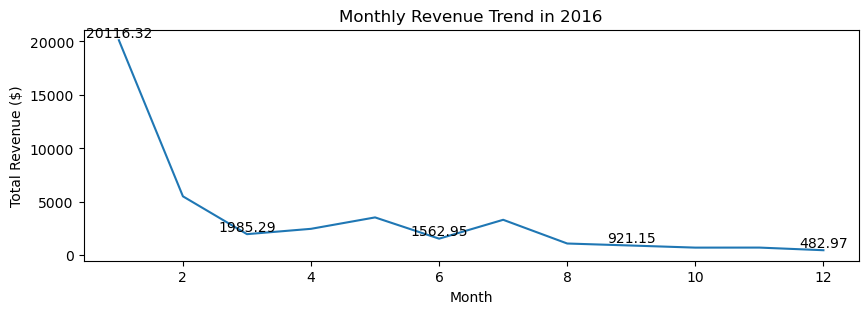

In [17]:
import matplotlib.pyplot as plt

# Create a line plot to visualize the revenue trend in 2016
plt.figure(figsize=(10, 3))
plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend in 2016')

# Add data labels for specific months (1, 3, 6, 9, 12)
for i, revenue in enumerate(revenue_by_month):
    if i+1 in [1, 3, 6, 9, 12]:
        plt.text(i+1, revenue, str(round(revenue, 2)), ha='center', va='bottom')

plt.show()


## Conclusion TASK 1

Based on the outcome of analysis and the observed revenue trend in 2016, we can draw the following conclusions:

1. **Lifetime Value (LTV):** The LTV for the 2016 is **$4,251,862**. LTV represents the total value generated by players over their lifetime engagement with the game. It provides an important metric to evaluate the overall financial performance and player contribution.

2. **Proportion of Revenue in the Player's First Week:** The proportion of lifetime revenue generated in the player's first week in 2016 is approximately 17.96%. This indicates that a significant portion of the total revenue earned over the player's lifetime was generated within their initial week of gameplay.

3. **Revenue Trend:** The line plot visualizes the revenue trend in 2016, showing the total revenue for each month. From the plot, it can be observed that the revenue decreased from January to December 2016.

4. **Decreasing Revenue Trend:** The decreasing revenue trend indicates a potential decline in player engagement and monetization over the course of the year. This may be attributed to various factors such as changes in player behavior, market competition, or shifts in monetization strategies.

5. **Strategic Considerations:** To address the decreasing revenue trend, it is important to analyze the underlying factors and implement strategic interventions. This could involve initiatives such as improving player retention, enhancing monetization strategies, introducing new content or features, or exploring marketing opportunities.

In conclusion, the analysis of revenue trends in 2016 reveals a decreasing trend from January to December. This highlights the need for proactive measures and strategic considerations to address the revenue decline and ensure sustained financial success. The insights gained from the LTV and the proportion of revenue in the player's first week provide valuable information for making informed decisions and optimizing the game's financial performance.



# TASK 2

## User Acquisition Analysis

### Analysis

In this section, we will analyze user acquisition to understand how users were acquired and their characteristics. Perform the following tasks:

In [18]:
# Check if account_id exists in df_iap_purchase
df_account['with_transactions'] = df_account['account_id'].isin(df_iap_purchase['account_id'])

# Assign 'yes' to accounts with transactions and 'no' to accounts without transactions
df_account['with_transactions'] = df_account['with_transactions'].map({True: 'yes', False: 'no'})

df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112792 entries, 0 to 112791
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   account_id            112792 non-null  object        
 1   created_time          112792 non-null  datetime64[ns]
 2   created_device        112792 non-null  object        
 3   created_platform      112792 non-null  object        
 4   country_code          112685 non-null  object        
 5   created_app_store_id  112792 non-null  int64         
 6   date                  112792 non-null  object        
 7   time                  112792 non-null  object        
 8   with_transactions     112792 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 7.7+ MB


In [19]:
account_counts = df_account['account_id'].value_counts().sum()
print('The number of account created in 2016 is', account_counts)

The number of account created in 2016 is 112792


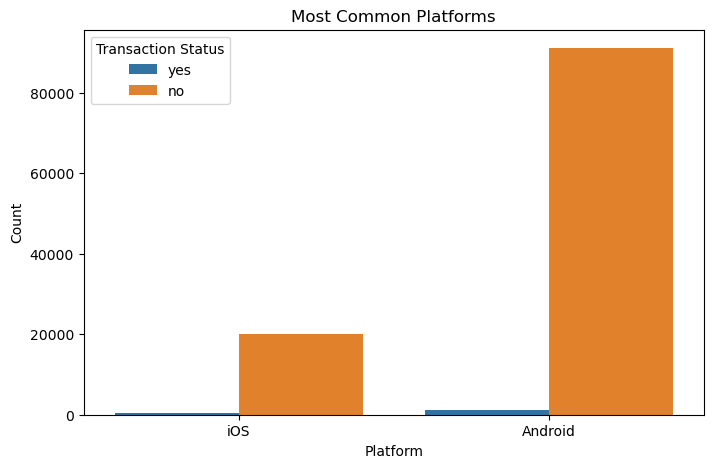

created_platform
Android    0.012477
iOS        0.019378
dtype: float64


In [20]:
# Analyze created_platform columns
platform_counts = df_account.groupby(['created_platform', 'with_transactions']).size().unstack(fill_value=0)

# Plot the most common platforms using sns.countplot
plt.figure(figsize=(8, 5))
sns.countplot(x=df_account['created_platform'],hue=df_account['with_transactions'])
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Most Common Platforms')
plt.legend(title='Transaction Status')
plt.show()

# Calculate the transaction rates based on created_platform
transaction_rates = platform_counts['yes'] / platform_counts.sum(axis=1)

# Print the transaction rates
print(transaction_rates)

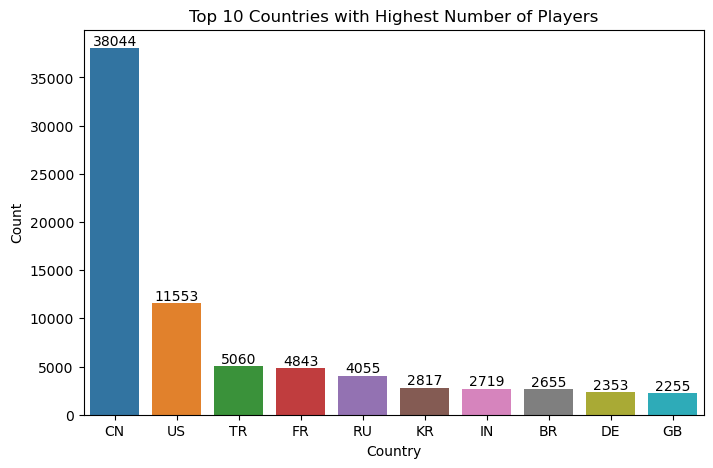

In [21]:
# Analyze country_code column
country_counts = df_account['country_code'].value_counts()

# Convert to DataFrame
country_counts_df = country_counts.head(10).reset_index()
country_counts_df.columns = ['Country', 'Count']

# Plot top 10 countries with the highest number of players
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Country', y='Count', data=country_counts_df)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Highest Number of Players')

# Display values on the chart
for i, count in enumerate(country_counts_df['Count']):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()


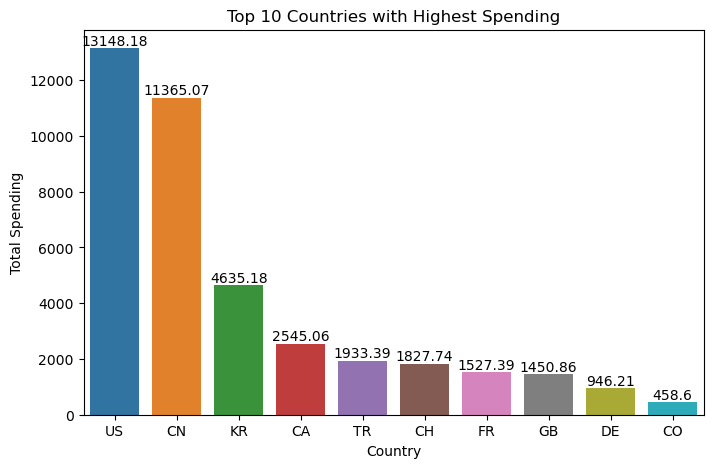

In [22]:
# Group the data by country_code and sum the iap_price_usd_cents
country_spending = merged_df.groupby('country_code')['iap_price_usd'].sum()

# Sort the countries by spending in descending order and take the top 10
top_spending_countries = country_spending.nlargest(10)

# Convert to DataFrame
top_spending_countries_df = top_spending_countries.reset_index()
top_spending_countries_df.columns = ['Country', 'Total Spending']

# Plot top 10 countries with the highest spending
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Country', y='Total Spending', data=top_spending_countries_df)
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Top 10 Countries with Highest Spending')

# Display values on the chart
for i, spending in enumerate(top_spending_countries_df['Total Spending']):
    ax.text(i, spending, str(round(spending,2)), ha='center', va='bottom')

plt.show()


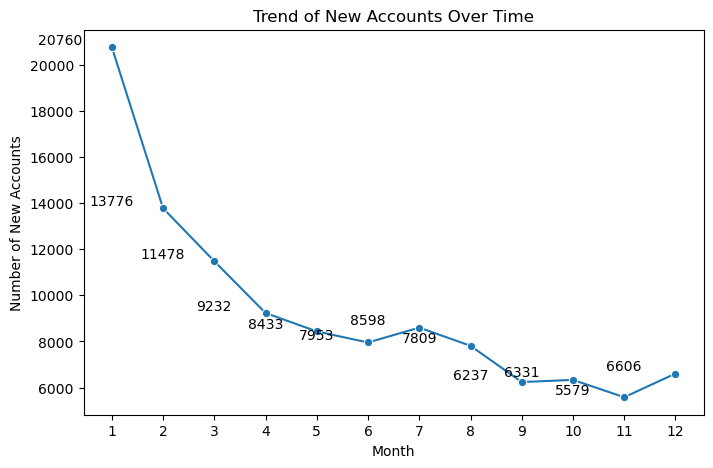

In [23]:
# Convert 'date' column to datetime type
df_account['date'] = pd.to_datetime(df_account['date'])

# Calculate the total number of new accounts created each month
df_account['month'] = df_account['date'].dt.month
monthly_new_accounts = df_account.groupby('month')['account_id'].count().reset_index()

# Plot the trend of new accounts over time
plt.figure(figsize=(8, 5))
ax = sns.lineplot(x='month', y='account_id', data=monthly_new_accounts, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of New Accounts')
plt.title('Trend of New Accounts Over Time')
plt.xticks(monthly_new_accounts['month'])

# Display values on the chart
for i, count in enumerate(monthly_new_accounts['account_id']):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()


### Conclusion


1. **The number of accounts created in 2016 is 112,792**: 
- Reflecting the user acquisition efforts during that year.
The Android platform had a significantly higher user count compared to the iOS platform, with approximately 4 times more accounts created.

2. **Geographic Distribution and Revenue**
- China (CN) emerged as the leading country with the highest number of players, accounting for almost 40K players. The United States (US) ranked second with over than 10K players. That is 2 countries has the most revenue with top 1 revenue is United States (US) `$`13,148.18 and top 2 is China (CN) with `$`11,365.07. Demonstrating substantial player engagement and contribution from these country.
- South Korea (KR) and France (FR) also have significant numbers of account creations and revenue, showcasing strong growth in the gaming market in these countries.
- Other countries in the top 10 leading country with the highest number of players , including Turkey (TR), France (FR), Russia (RU), South Korea (KR), India (IN), Brazil (BR), Germany (DE), and the United Kingdom (GB), also had notable player counts ranging more than 2K.
- The player count in China was approximately 4 times higher than the player count in the United States, indicating a significant disparity between the top two countries. The lowest player count among the top 10 countries, Germany (DE), was nearly 20 times lower than China's count.


3. **Trend Analysis**
- The trend of new account creation varied throughout the year, with a noticeable decline in certain months. This suggests a potential decrease in user acquisition or a saturated market during those periods.
- The decline in the number of new accounts created can have implications for revenue generation, as it indicates a smaller pool of potential players joining the game.
- With fewer new players entering the game, there may be reduced opportunities for monetization and engagement, leading to a downward trend in revenue.

**Overall, this analysis provides insights into user acquisition and player distribution across different countries. The significant difference in player counts between China and other countries highlights the importance of understanding market dynamics and tailoring strategies accordingly. The declining trend in new account creation raises concerns about future revenue generation, emphasizing the need for further investigation and strategic adjustments to address the challenges faced in user acquisition and revenue growth.**

## User Engagement Analysis

### Analysis

Next, let's analyze user engagement to gain insights into how players interact with the game. Perform the following:

In [24]:
# Merge df_account and df_account_date_session on 'account_id'
merged2_df = pd.merge(df_account, df_account_date_session, on='account_id', how='right')
merged2_df.head()

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id,date_x,time,with_transactions,month,date_y,session_count,session_duration_sec
0,68730811144,2016-01-01 03:59:52.347,SM-G900V,Android,US,2,2016-01-01,03:59:52.347000,no,1,2016-01-01,1,47
1,68730812806,2016-01-01 05:15:58.094,NXA116QC164,Android,US,2,2016-01-01,05:15:58.094000,no,1,2016-01-01,1,204
2,68730829426,2016-01-01 15:52:35.871,MotoG3,Android,CO,2,2016-01-01,15:52:35.871000,no,1,2016-01-01,12,4703
3,68730829426,2016-01-01 15:52:35.871,MotoG3,Android,CO,2,2016-01-01,15:52:35.871000,no,1,2016-01-02,9,4676
4,68730829426,2016-01-01 15:52:35.871,MotoG3,Android,CO,2,2016-01-01,15:52:35.871000,no,1,2016-01-03,9,2271


In [25]:
# Calculate the total number of sessions and total session duration for each account
session_counts = merged2_df.groupby(['account_id']).size()
session_counts.describe()

count    112451.000000
mean         15.108572
std          42.112038
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         366.000000
dtype: float64

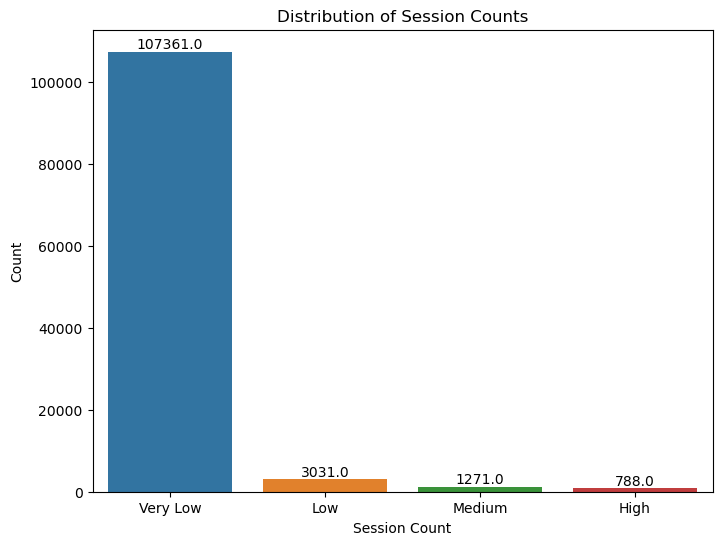

In [26]:
# Create bins for 4 categories in session count (Very Low stand for 0-1; Low stand for 1-2; Medium stand for 2-7; High stand for 7-366 times)
bins = pd.cut(session_counts, bins=4, labels=['Very Low', 'Low', 'Medium', 'High'])
# Plot the count of sessions in each bin
plt.figure(figsize=(8, 6))
sns.countplot(x=bins)

# Set value labels on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set chart title and labels
plt.xlabel('Session Count')
plt.ylabel('Count')
plt.title('Distribution of Session Counts')
plt.show()

In [27]:
# Calculate the total number of sessions and total session duration for each account
total_durations = (merged2_df.groupby('account_id')['session_duration_sec'].sum())/60
total_durations.describe()

count    112451.000000
mean        361.156374
std        1555.073131
min           0.016667
25%           1.316667
50%          16.383333
75%         112.283333
max       60627.000000
Name: session_duration_sec, dtype: float64

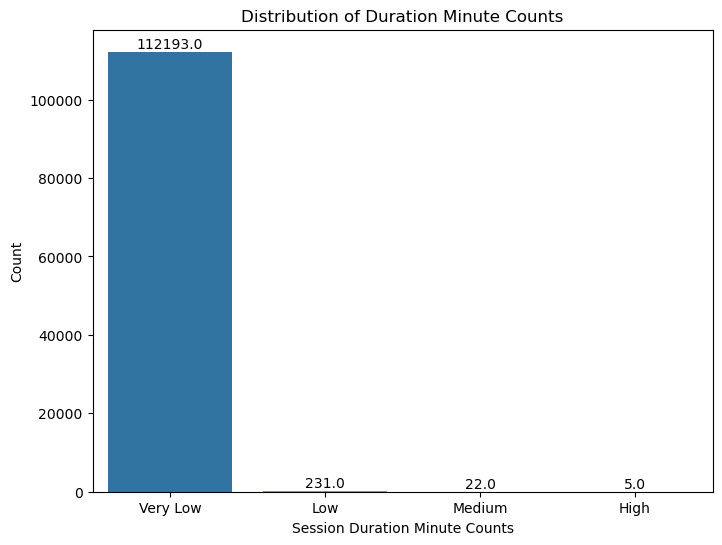

In [28]:
# Create bins for 4 categories in total duration (Very Low stand for 0-1; Low stand for 1-16; Medium stand for 16-112; High stand for 112-60627 minutes)
duration_bins = pd.cut(total_durations, bins=4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Plot the count of sessions in each bin
plt.figure(figsize=(8, 6))
sns.countplot(x=duration_bins)

# Set value labels on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set chart title and labels
plt.xlabel('Session Duration Minute Counts')
plt.ylabel('Count')
plt.title('Distribution of Duration Minute Counts')
plt.show()

### Conclusion

1. **Session Counts**
User engagement in 2016 primarily revolves around single-session players, with an increasing frequency of sessions up to 7 times. However, only a small percentage of players exhibit high session frequency, potentially indicating a loyal and engaged player segment. To enhance user engagement, it is essential to address factors that discourage players from returning to the game after their initial session. Improving game mechanics, introducing new features, or providing incentives may help increase player retention. Encouraging regular and sustained engagement among players with moderate session counts can be achieved through targeted events, rewards, and community-building initiatives. This group represents a valuable segment with potential for further growth.
       
2. **Session Duration Minute Counts**
The distribution of session durations in minutes shows the following:There were 112,193 instances where players had a session duration of 1 minute in 2016, which is very low. There were 238 instances where players had a session duration of more than 1 minute.
    User engagement in 2016 is characterized by a large number of players who have very short session durations, indicating a lack of sustained interest or engagement with the game. To improve user engagement, it is crucial to focus on enhancing the game's appeal and providing more compelling content or features that encourage players to spend more time in each session.
3. **Developing strategies to nurture and retain highly engaged players can contribute to long-term success**. This can include exclusive rewards, personalized experiences, and ongoing content updates to maintain their interest and satisfaction. By understanding user engagement patterns and implementing appropriate strategies, game developers and managers can optimize player experiences, increase retention, and drive revenue growth.

## Monetization Analysis

### Analysis

In [29]:
# Review the table inner join between "account" and "iap_purchase"
merged_df.head()

,account_id,created_time_x,created_device,created_platform,country_code,created_app_store_id,date_x,time_x,created_time_y,package_id_hash,iap_price_usd_cents,app_store_id,date_y,time_y,purchase_time_since_creation,iap_price_usd,month
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1,2016-03-02,17:11:00.332000,2016-03-11 09:16:29.313,99a9e0e63efa2fdce8fc8de74c66cea9,184,0,2016-03-11,09:16:29.313000,8 days 16:05:28.981000,1.84,3
1,14894920,2016-06-25 14:09:19.562,HUAWEI P7-L09,Android,CN,3,2016-06-25,14:09:19.562000,2016-06-29 14:47:41.680,efd2eebfdc98b55f9e6b45915d56f7ac,36,3,2016-06-29,14:47:41.680000,4 days 00:38:22.118000,0.36,6
2,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-16 13:08:40.206,efd2eebfdc98b55f9e6b45915d56f7ac,36,10,2016-09-16,13:08:40.206000,258 days 01:50:19.901000,0.36,1
3,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-18 09:49:06.686,99a9e0e63efa2fdce8fc8de74c66cea9,184,10,2016-09-18,09:49:06.686000,259 days 22:30:46.381000,1.84,1
4,12365400,2016-01-02 11:18:20.305,"iPhone8,1",iOS,CN,1,2016-01-02,11:18:20.305000,2016-09-20 07:49:32.397,99a9e0e63efa2fdce8fc8de74c66cea9,184,10,2016-09-20,07:49:32.397000,261 days 20:31:12.092000,1.84,1


In [30]:
# In Task 1 we have total_lifetime_revenue (ALV) already

# Calculate the average revenue per user (ARPU) and average revenue per paying user (ARPPU)
arpu = total_lifetime_revenue / df_account['account_id'].nunique()
arppu = total_lifetime_revenue / df_iap_purchase['account_id'].nunique()
print('Revenue per user ($):', round(arpu,2))
print('Revenue per paying user ($):', round(arppu,2))

Revenue per user ($): 0.38
Revenue per paying user ($): 27.45


In [31]:
# Count the occurrences of each price point
iap_price_distribution = merged_df['iap_price_usd'].value_counts()
iap_price_distribution.head()
iap_price_distribution_sorted = iap_price_distribution.sort_values(ascending=False)
top_price_points = iap_price_distribution_sorted.head(10)
print(top_price_points)

1.84     3084
0.36     2566
3.69     2073
7.39     1426
18.49     369
36.99     292
1.10       99
Name: iap_price_usd, dtype: int64


In [32]:
# Merge df_account and df_account_date_session on 'account_id'
merged3_df = pd.merge(df_iap_purchase, df_account_date_session, on='account_id', how='inner')
merged3_df.head()

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id,date_x,time,date_y,session_count,session_duration_sec
0,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000,2016-01-23,5,1796
1,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000,2016-01-24,10,5076
2,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000,2016-01-25,7,2372
3,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000,2016-01-26,5,1344
4,30077202816,2016-03-26 23:59:59.355,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0,2016-03-26,23:59:59.355000,2016-01-27,6,4529


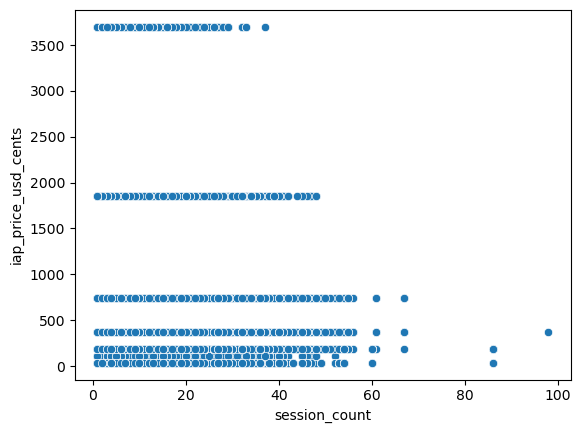

In [33]:
# Scatter plot between session count and revenue
sns.scatterplot(x='session_count', y='iap_price_usd_cents', data=merged3_df)
plt.show()

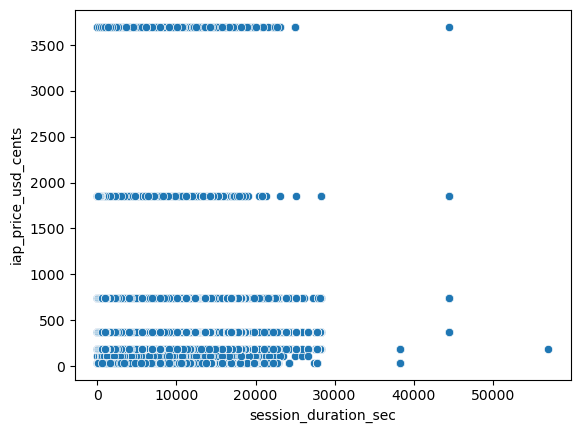

In [34]:
# Scatter plot between session duration and revenue
sns.scatterplot(x='session_duration_sec', y='iap_price_usd_cents', data=merged3_df)
plt.show()

In [35]:
correlation = merged3_df['session_count'].corr(merged3_df['iap_price_usd_cents'])
print("Correlation between session count and revenue:", correlation)

correlation2 = merged3_df['session_duration_sec'].corr(merged3_df['iap_price_usd_cents'])
print("Correlation between session duration and revenue:", correlation2)

Correlation between session count and revenue: 0.048477397490326174
Correlation between session duration and revenue: 0.08975701640336363


**Correlation between session count, session duration and revenue**
+ The correlation between session count and revenue is very weak, with a correlation coefficient of approximately 0.048. This indicates that there is no strong relationship between the number of sessions played by users and the revenue generated from monetization.

+ Similarly, the correlation between session duration and revenue is also very weak, with a correlation coefficient of approximately 0.090. This suggests that there is no strong relationship between the duration of user sessions and the revenue generated.

### Conclusion

1. **Revenue per user**
Revenue per user: The average revenue generated per user is 0.38 dolar. This metric represents the average amount of revenue generated by each user, indicating the overall monetization effectiveness of the game.

Revenue per paying user ($): The average revenue generated per paying user is 27.45 dolar. This metric calculates the average revenue generated by users who made in-app purchases, providing insight into the monetization potential of paying users.

2. **Top price points**: The distribution of in-app purchase prices shows several notable price points. Has 7 price points and their respective occurrences are as follows: 
+ 1.84: 3084 occurrences
+ 0.36: 2566 occurrences
+ 3.69: 2073 occurrences
+ 7.39: 1426 occurrences
+ 18.49: 369 occurrences
+ 36.99: 292 occurrences
+ 1.10: 99 occurrences
       
These insights provide an understanding of the revenue generated per user and per paying user, as well as the most common price points for in-app purchases. They can be used to inform monetization strategies and optimize pricing to maximize revenue and user engagement.